# Plot performance of Kavier predicting at various export rates, and compared to reality (502h) and nfr requirement (5h)

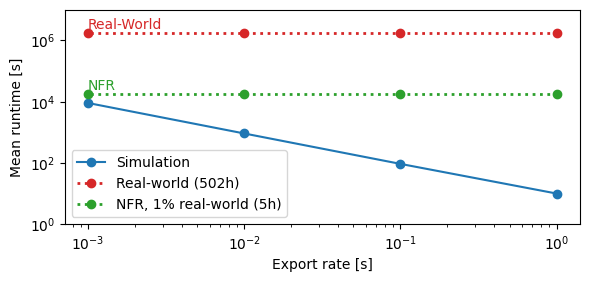

In [2]:
import numpy as np
import matplotlib.pyplot as plt

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
blue, orange, green, red = default_colors[:4]

export_rate  = np.array([1, 0.1, 0.01, 0.001])
mean_time  = np.array([9.975, 92.785, 913.450, 9039.700])  # seconds

nfr_sec        = 5   * 3600
real_world_sec = 502 * 3600
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(export_rate, mean_time,
        marker='o', linestyle='-', color=blue, label='Simulation')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**0, 10**7)

# Real-world line with dots
x_coords = export_rate
real_world_y = np.full_like(x_coords, real_world_sec)
ax.plot(x_coords, real_world_y,
        marker='o', linestyle=':', color=red, linewidth=2,
        label='Real-world (502h)')

# NFR line with dots
nfr_y = np.full_like(x_coords, nfr_sec)
ax.plot(x_coords, nfr_y,
        marker='o', linestyle=':', color=green, linewidth=2,
        label='NFR, 1% real-world (5h)')



ax.text(export_rate.min(), real_world_sec * 1.05, 'Real-World', color=red,   ha='left', va='bottom')
ax.text(export_rate.min(), nfr_sec        * 1.05, 'NFR',        color=green, ha='left', va='bottom')

ax.set_xlabel('Export rate [s]')
ax.set_ylabel('Mean runtime [s]')
ax.legend()

plt.tight_layout()
plt.savefig('experiment1-performance.pdf')
